In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gd

In [73]:
df=pd.read_csv(r"C:\Users\banig\Downloads\archive\ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [75]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [76]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [77]:
df.isnull().sum()   

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [78]:
df["Avg VTAT"]                            

0          NaN
1          4.9
2         13.4
3         13.1
4          5.3
          ... 
149995    10.2
149996     5.1
149997     2.7
149998     6.9
149999     3.5
Name: Avg VTAT, Length: 150000, dtype: float64

In [79]:

df.columns= [
    "Date", 
    "Time", 
    "Booking ID", 
    "Booking Status", 
    "Customer ID", 
    "Vehicle Type", 
    "Pickup Location", 
    "Dropoff Location", 
    "Average VTAT (Vehicle Turnaround Time)", 
    "Average CTAT (Customer Turnaround Time)", 
    "Customer Cancellations", 
    "Customer Cancellation Reason", 
    "Driver Cancellations", 
    "Driver Cancellation Reason", 
    "Incomplete Rides", 
    "Incomplete Ride Reason", 
    "Booking Value (Fare)", 
    "Ride Distance (km)", 
    "Driver Rating", 
    "Customer Rating", 
    "Payment Method"
]

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),...,Customer Cancellation Reason,Driver Cancellations,Driver Cancellation Reason,Incomplete Rides,Incomplete Ride Reason,Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [80]:
df.shape

(150000, 21)

In [81]:
cols_to_drop = [
    'Customer Cancellations',
    'Customer Cancellation Reason',
    'Driver Cancellations',
    'Driver Cancellation Reason',
    'Incomplete Rides',
    'Incomplete Ride Reason'
]
df.drop(columns=cols_to_drop, inplace=True)


In [82]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.0,48.21,4.1,4.3,UPI


In [83]:
df

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,333.0,45.54,4.1,3.7,UPI


In [84]:
df.isnull().sum()

Date                                           0
Time                                           0
Booking ID                                     0
Booking Status                                 0
Customer ID                                    0
Vehicle Type                                   0
Pickup Location                                0
Dropoff Location                               0
Average VTAT (Vehicle Turnaround Time)     10500
Average CTAT (Customer Turnaround Time)    48000
Booking Value (Fare)                       48000
Ride Distance (km)                         48000
Driver Rating                              57000
Customer Rating                            57000
Payment Method                             48000
dtype: int64

In [85]:
columns_to_fill = [
    "Average VTAT (Vehicle Turnaround Time)",
    "Average CTAT (Customer Turnaround Time)",
    "Booking Value (Fare)",
    "Ride Distance (km)",
    "Driver Rating",
    "Customer Rating"
]

df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())


In [86]:
df.isnull().sum()

Date                                           0
Time                                           0
Booking ID                                     0
Booking Status                                 0
Customer ID                                    0
Vehicle Type                                   0
Pickup Location                                0
Dropoff Location                               0
Average VTAT (Vehicle Turnaround Time)         0
Average CTAT (Customer Turnaround Time)        0
Booking Value (Fare)                           0
Ride Distance (km)                             0
Driver Rating                                  0
Customer Rating                                0
Payment Method                             48000
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Date                                     150000 non-null  object 
 1   Time                                     150000 non-null  object 
 2   Booking ID                               150000 non-null  object 
 3   Booking Status                           150000 non-null  object 
 4   Customer ID                              150000 non-null  object 
 5   Vehicle Type                             150000 non-null  object 
 6   Pickup Location                          150000 non-null  object 
 7   Dropoff Location                         150000 non-null  object 
 8   Average VTAT (Vehicle Turnaround Time)   150000 non-null  float64
 9   Average CTAT (Customer Turnaround Time)  150000 non-null  float64
 10  Booking Value (Fare)            

In [88]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,29.149636,508.295912,24.637012,4.230992,4.404584,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,237.000000,5.730000,4.230992,4.404584,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,627.000000,13.580000,4.900000,4.900000,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,416.000000,34.020000,4.600000,5.000000,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,737.000000,48.210000,4.100000,4.300000,UPI


In [89]:
df["Payment Method"]=df["Payment Method"].fillna(df["Payment Method"].mode()[0])

In [90]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,29.149636,508.295912,24.637012,4.230992,4.404584,UPI
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,237.000000,5.730000,4.230992,4.404584,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,627.000000,13.580000,4.900000,4.900000,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,416.000000,34.020000,4.600000,5.000000,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,737.000000,48.210000,4.100000,4.300000,UPI


In [91]:
df.isnull().sum()

Date                                       0
Time                                       0
Booking ID                                 0
Booking Status                             0
Customer ID                                0
Vehicle Type                               0
Pickup Location                            0
Dropoff Location                           0
Average VTAT (Vehicle Turnaround Time)     0
Average CTAT (Customer Turnaround Time)    0
Booking Value (Fare)                       0
Ride Distance (km)                         0
Driver Rating                              0
Customer Rating                            0
Payment Method                             0
dtype: int64

In [92]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.456352,29.149636,508.295912,24.637012,4.230992,4.404584,UPI
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,237.000000,5.730000,4.230992,4.404584,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.400000,25.800000,627.000000,13.580000,4.900000,4.900000,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,416.000000,34.020000,4.600000,5.000000,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.300000,19.600000,737.000000,48.210000,4.100000,4.300000,UPI


In [ ]:
#we can use it for removeing special characters from more than one columns  directely using loop
for col in ['Booking ID', 'Customer ID']:
    df[col] = df[col].str.replace(r'\W','', regex=True)


In [103]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Dropoff Location,Average VTAT (Vehicle Turnaround Time),Average CTAT (Customer Turnaround Time),Booking Value (Fare),Ride Distance (km),Driver Rating,Customer Rating,Payment Method
0,2024-03-23,12:29:38,CNR5884300,No Driver Found,CID1982111,eBike,Palam Vihar,Jhilmil,8.456352,29.149636,508.295912,24.637012,4.230992,4.404584,UPI
1,2024-11-29,18:01:39,CNR1326809,Incomplete,CID4604802,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.900000,14.000000,237.000000,5.730000,4.230992,4.404584,UPI
2,2024-08-23,08:56:10,CNR8494506,Completed,CID9202816,Auto,Khandsa,Malviya Nagar,13.400000,25.800000,627.000000,13.580000,4.900000,4.900000,Debit Card
3,2024-10-21,17:17:25,CNR8906825,Completed,CID2610914,Premier Sedan,Central Secretariat,Inderlok,13.100000,28.500000,416.000000,34.020000,4.600000,5.000000,UPI
4,2024-09-16,22:08:00,CNR1950162,Completed,CID9933542,Bike,Ghitorni Village,Khan Market,5.300000,19.600000,737.000000,48.210000,4.100000,4.300000,UPI


In [ ]:
#we can use it for removeing special characters from specific columns
df["Customer ID"]=df["Customer ID"].str.replace(r'\W', '', regex=True)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Date                                     150000 non-null  object 
 1   Time                                     150000 non-null  object 
 2   Booking ID                               150000 non-null  object 
 3   Booking Status                           150000 non-null  object 
 4   Customer ID                              150000 non-null  object 
 5   Vehicle Type                             150000 non-null  object 
 6   Pickup Location                          150000 non-null  object 
 7   Dropoff Location                         150000 non-null  object 
 8   Average VTAT (Vehicle Turnaround Time)   150000 non-null  float64
 9   Average CTAT (Customer Turnaround Time)  150000 non-null  float64
 10  Booking Value (Fare)            

In [113]:
for col in [['Booking Status','Pickup Location','Dropoff Location','Payment Method','Vehicle Type']]:
    df[col]=df[col].astype('category')

In [110]:
for col in[['Date','Time']]:
    df[col]=df[col].astype('datetime64[ns]')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Date                                     150000 non-null  datetime64[ns]
 1   Time                                     150000 non-null  datetime64[ns]
 2   Booking ID                               150000 non-null  object        
 3   Booking Status                           150000 non-null  category      
 4   Customer ID                              150000 non-null  object        
 5   Vehicle Type                             150000 non-null  category      
 6   Pickup Location                          150000 non-null  category      
 7   Dropoff Location                         150000 non-null  category      
 8   Average VTAT (Vehicle Turnaround Time)   150000 non-null  float64       
 9   Average CTAT (Customer Tur

In [115]:
for col in ['Booking ID', 'Customer ID']:
    df[col]=df[col].astype('string')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   Date                                     150000 non-null  datetime64[ns]
 1   Time                                     150000 non-null  datetime64[ns]
 2   Booking ID                               150000 non-null  string        
 3   Booking Status                           150000 non-null  category      
 4   Customer ID                              150000 non-null  string        
 5   Vehicle Type                             150000 non-null  category      
 6   Pickup Location                          150000 non-null  category      
 7   Dropoff Location                         150000 non-null  category      
 8   Average VTAT (Vehicle Turnaround Time)   150000 non-null  float64       
 9   Average CTAT (Customer Tur

Text(0.5, 1.0, 'Booking Status Distribution')

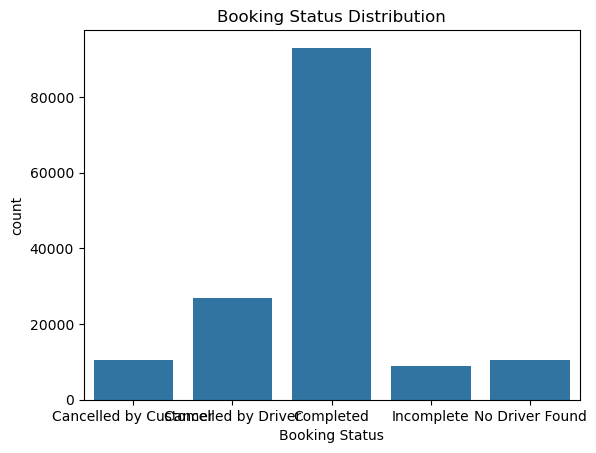

In [117]:
sns.countplot(data=df, x='Booking Status')
plt.title('Booking Status Distribution')


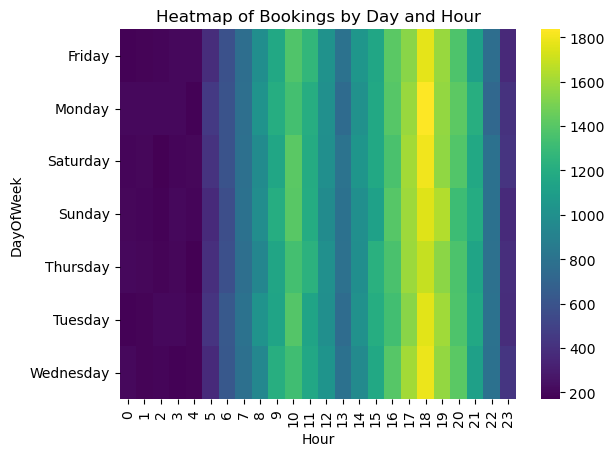

In [122]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of Bookings by Day and Hour')
plt.show()


C:\Users\banig\AppData\Local\Temp\ipykernel_4308\771609216.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='Date', freq='M')).size()


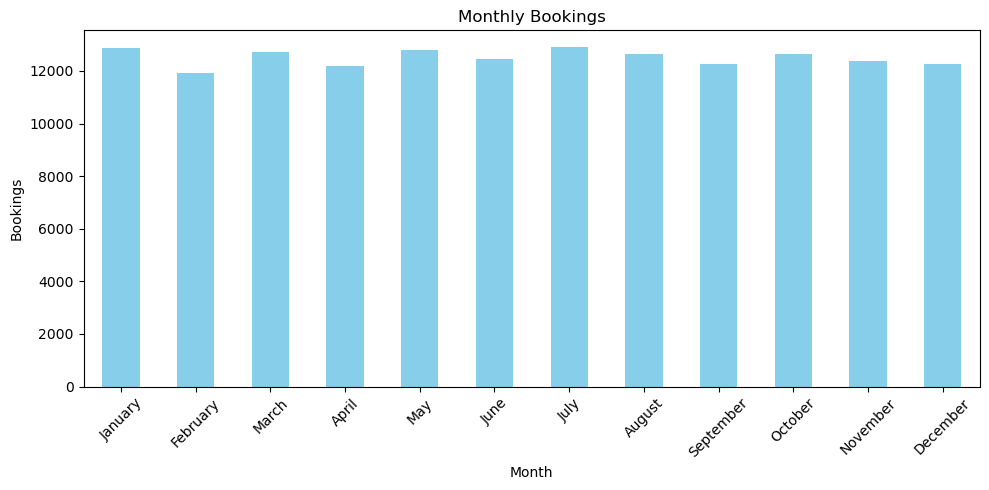

In [123]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by month
monthly = df.groupby(pd.Grouper(key='Date', freq='M')).size()

# Convert index to month names
monthly.index = monthly.index.strftime('%B')  # For full month names
# Or use '%b' for short month names like 'Jan', 'Feb', etc.

# Plot
monthly.plot(kind='bar', figsize=(10, 5), title='Monthly Bookings', color='skyblue')

plt.ylabel('Bookings')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Vehicle Type Usage')

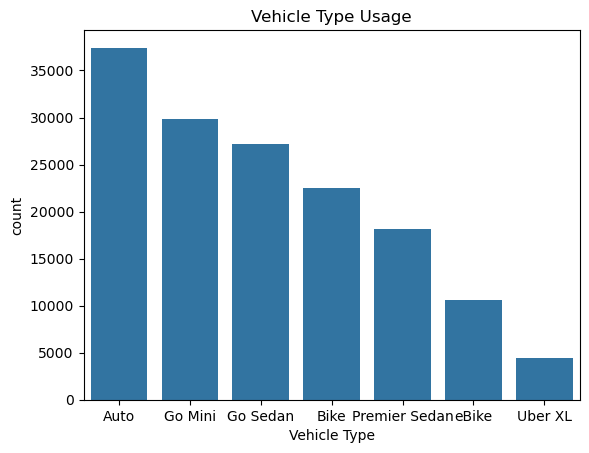

In [124]:
sns.countplot(data=df, x='Vehicle Type', order=df['Vehicle Type'].value_counts().index)
plt.title('Vehicle Type Usage')


C:\Users\banig\AppData\Local\Temp\ipykernel_4308\1032114759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


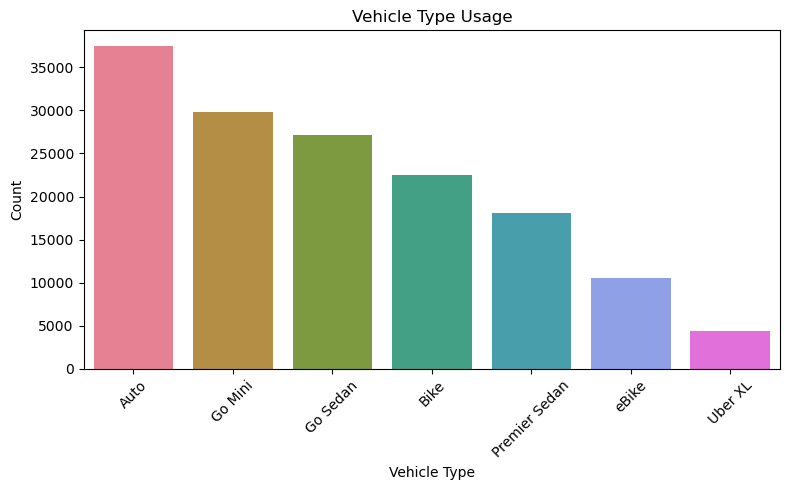

In [130]:


plt.figure(figsize=(8, 5))

sns.countplot(
    data=df,
    x='Vehicle Type',
    order=df['Vehicle Type'].value_counts().index,
    palette='husl'  # Try: 'Set1', 'Set2', 'Set3', 'Pastel1', 'husl', etc.
)

plt.title('Vehicle Type Usage')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Fare Distribution')

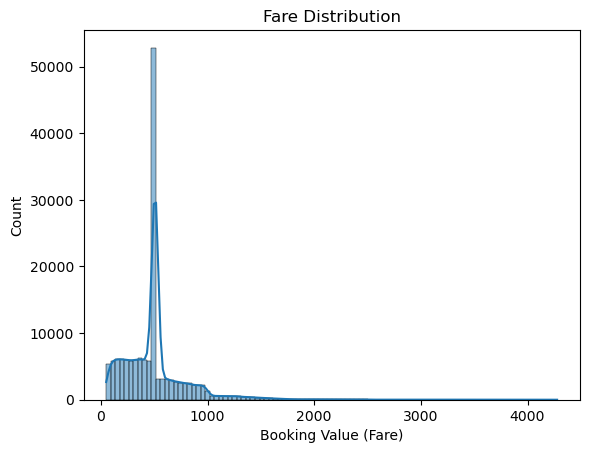

In [133]:
sns.histplot(df['Booking Value (Fare)'], bins=100, kde=True)
plt.title('Fare Distribution')


In [131]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Ride Distance Distribution')

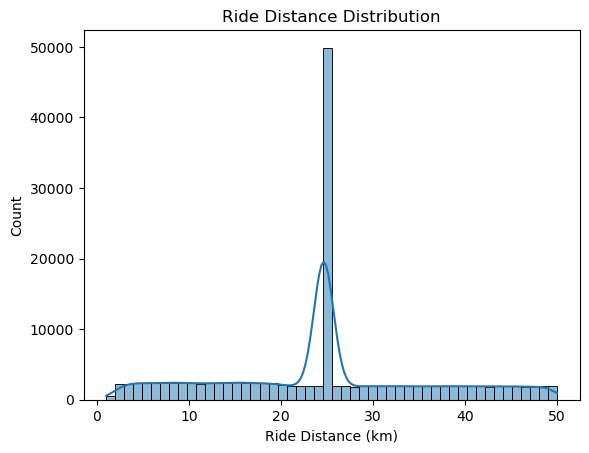

In [134]:
sns.histplot(df['Ride Distance (km)'], bins=50, kde=True)
plt.title('Ride Distance Distribution')


Text(0.5, 1.0, 'Driver vs Customer Rating Distribution')

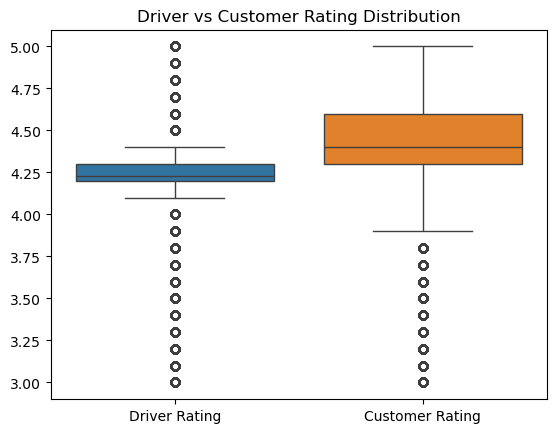

In [135]:
sns.boxplot(data=df[['Driver Rating', 'Customer Rating']])
plt.title('Driver vs Customer Rating Distribution')


Text(0.5, 1.0, 'Payment Method Distribution')

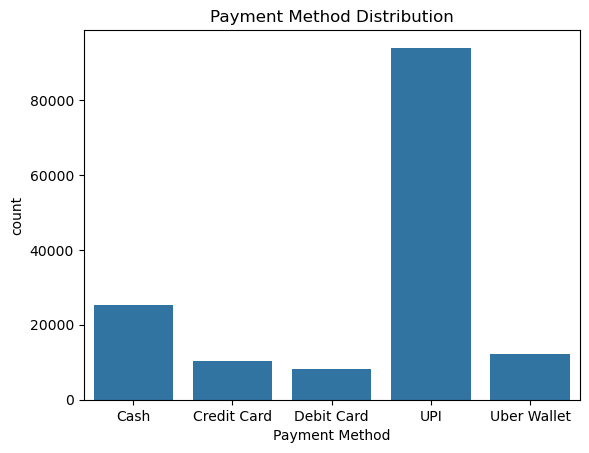

In [136]:
sns.countplot(data=df, x='Payment Method')
plt.title('Payment Method Distribution')


Text(0.5, 1.0, 'Fare vs Distance')

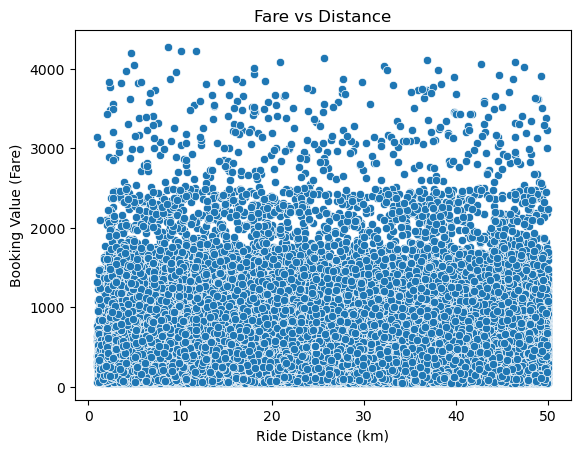

In [ ]:
sns.scatterplot(data=df, x='Ride Distance (km)', y='Booking Value (Fare)',)
plt.title('Fare vs Distance')


<Axes: title={'center': 'Top Pickup Locations'}, xlabel='Pickup Location'>

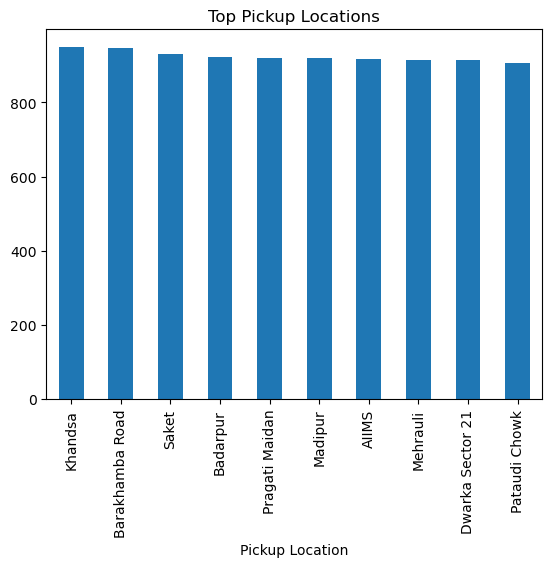

In [140]:
df['Pickup Location'].value_counts().head(10).plot(kind='bar', title='Top Pickup Locations')
